# Building a Layer Lab

### Introduction

In the last lesson, we saw what it meant to build a layer of a neural network.  
* An **individual neuron** in a layer can be represented by a **vector** of weights and a bias.
* An entire **layer** can be represented by a **matrix of weights** and a bias vector.  

In this lesson, we'll work towards making predictions with the layer of a network.

Now let's try to build the initial layer of a neural network for the MNIST dataset.  The MNIST dataset is a classic dataset for practicing with a neural network.  We'll see that it is a dataset of images of handwritten digits.  

The eventual task is to train a neural network so that it can predict the associated digit of each handwritten image.

In this lesson, we won't be training the network but instead, will start with the first step of initializing the weights and biases of the first layer.

### Architecting our Network

Let's build a weight matrix and a bias vector for a network that looks like the following:

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = \sigma(z_1) \\
\end{aligned}
$$

Ok, now let's load up the mnist dataset.

### Loading our Data

> Press shift + return on the cells below.

In [1]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [2]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

with gzip.open(path, 'rb') as f:
    ((X, y), (X_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

The MNIST dataset gives us both a training set, and a validation set (whatever that means).  We just need to use the training data, available in $X$ and $y$.

A quick inspection of the training data shows that we have fifty thousand observations, and that each observation has 784 features.

In [3]:
X.shape

(50000, 784)

Let's take a look at the first observation.

In [3]:
X[0].shape

(784,)

In [47]:
X[0]

array([0., 0., 0., 0., ..., 0., 0., 0., 0.], dtype=float32)

Each number in the observation represents a single pixel in a 28 by 28 pixel image.  We can see the image with matplotlib.  Let's select the first observation and plot it below.

> Feel free to change the index from zero to plot different observations.

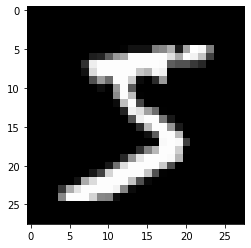

In [42]:
mpl.rcParams['image.cmap'] = 'gray'
img = tensor(X[0]) # change the index here
plt.imshow(img.view((28,28)));

### Creating a model

Ok, so now let's work toward initializing a weights and bias matrix for this data.

Remember, that we can use the numpy library to construct a weight matrix.  For example, below is weight matrix representing the weights of two neurons, each of which accepts three features.

In [43]:
import numpy as np
np.random.randn(3, 2)

array([[ 0.755722,  1.052411],
       [ 0.253561, -0.311297],
       [ 1.7933  , -1.213926]])

> Your turn.

Now construct a weight matrix that has 15 neurons, where each neuron takes as an input, every feature from an observation of our MNIST dataset.  Remember each observation -- that is each image of a handwritten digit -- has 784 features, one for each pixel.

> Use the `np.random.randn` to construct the weight matrix W1.

In [44]:
import numpy as np
W1 = None

> Let's check that we can multiply each weight by feature in our first observation.

In [51]:
X[0].dot(W1).shape

# (15,)

(15,)

So we get back fifteen entries, one for each neuron.

> And if we pass through 100 observations, we return 15 outputs for each observation.

In [53]:
X[:100].dot(W1).shape

(100, 15)

So we accomplished this by letting $W_1$ have a row for each feature.

In [54]:
W1.shape
# (784, 15)

(784, 15)

Now construct the bias vector for the first layer.

In [55]:
b1 = None

In [56]:
b1.shape
# (15,)

(15,)

We can assign the total output from our weights and biases to $Z_1$.

In [60]:
Z1 = X[:50].dot(W1) + b1
Z1.shape

(50, 15)

And we can feed each of these outputs through our sigmoid layer, to see the outputs from our activation layer.

In [72]:
def sigmoid(value): return 1/(1 + np.exp(-value))

In [73]:
A1 = sigmoid(Z1)
A1.shape

(50, 15)

So we can see that all of the outputs from our activation layer are now between 0 and 1.

In [76]:
np.all((A1 > 0) & (A1 < 1))

True

### Automating the construction

Below we have created a function that follows the general pattern for constructing the linear layers of a neural network.  We execute the function in the cell below.  See if you can understand what the function is doing.  

In [77]:
import numpy as np
np.random.seed(0)

def init_model(n_features, neur_l1):
    W1 = np.random.randn(n_features, neur_l1) 
    b1 = np.zeros((1, neur_l1))
    model = {'W1': W1, 'b1': b1}
    return model

In [78]:
# n_features = 28*28 = 784
initial_model = init_model(28*28, 15)
# initial_model

And then uncomment the `initial_model` to see if matrices and vectors constructed by the function match the weight matrices and bias vectors that you constructed above.

> We can then use the weights and biases initialized in the model to make the first prediction.

In [32]:
X[0].shape

(784,)

In [84]:
(X[:1].dot(initial_model['W1']) + initial_model['b1']).shape

(1, 15)

> We can see that each of the fifteen neurons makes a separate prediction for the first observation.

### Answers

In [40]:
W1 = W1 = np.random.randn(784, 15)
b1 = np.random.randn(15)

<center>
<a href="https://www.jigsawlabs.io/free" style="position: center"><img src="https://storage.cloud.google.com/curriculum-assets/curriculum-assets.nosync/mom-files/jigsaw-labs.png" width="15%" style="text-align: center"></a>
</center>